In [1]:
import json
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
def lire_fichier (chemin):
    with open(chemin) as json_data: 
        texte =json.load(json_data)
    return texte

# Graphique  pour les distances sur chaque textes

In [53]:
tableau={}
liste_version_spacy=[]
liste_config=[]
liste_dist=[]
liste_auteur=[]
liste_name_metric=[]
liste_version_ren=[]

## Ajouter : a représenter spacy 3.7, 3.5.1 et 2.3.5 sur les mêmes graphiques, b 1 graph distance cosinus et 1 graph distance jaccard.

calcul=["sim2-3","word"]
calc=calcul[0]
spacy_mod=["lg","sm","md"]
spc_mod=spacy_mod[0]
x=0.9
path_data =f"../small-ELTeC-fra_spaCy_Distances/*/*/*OCR/*/NER/SIM/{calc}*.json"

for path in glob.glob(path_data):
    # print(path)
    if spc_mod in path:
        autor=path.split("/")[3]
        if "_" in autor:
            autor=autor.split("_")[0]
        print(autor)
        version=path.split("/")[5]
        version=version.split("_")[-1]
        print(version)
        vers_ren=path.split("_")[-1].split("-liste.json")[0]
        print("vers_ren",vers_ren)
    #     
        distance=lire_fichier(path)
        # print(distance)

        if version=="Kraken-base.txt" or version=="kraken" or version=="Kraken" :
            version=re.sub("Kraken-base.txt|kraken|Kraken",f"Kraken -- {vers_ren}",version)
            print("Version : ", version)

        if version=="kraken-jspll-pretrain.txt" or version=="kraken-jspll-pretrain":
            version=re.sub("kraken-jspll-pretrain.txt|kraken-jspll-pretrain","Kraken--jspl-fr",version)
            print("Version : ", version)
        if version=="Kraken-jspll-pretrain":
            version=re.sub("Kraken-jspll-pretrain","Kraken--jspl-en",version)
            print("Version : ", version)

        if version=="kraken-jspll-ELTeC.txt" or version=="kraken-jspll-ELTeC" :
            version=re.sub("kraken-jspll-ELTeC.txt|kraken-jspll-ELTeC","Kraken--jspl-ELTeCfr",version)
            print("Version : ", version)
        if  version=="Kraken-jspll-ELTeC":
            version=re.sub("Kraken-jspll-ELTeC","Kraken--jspl-ELTeCen",version)
            print("Version : ", version)
        if  version=="Kraken-jspl-ELTeC":
            version=re.sub("Kraken-jspl-ELTeC","Kraken--jspl-ELTeCpt",version)
            print("Version : ", version)

        if version=="TesseractFra-PNG.txt" or version=="TesseractFra-PNG" or version=="TesseractFra-png":
            version=re.sub("TesseractFra-PNG.txt|TesseractFra-PNG|TesseractFra-png",f"Tess. fr -- _{vers_ren}",version)
            print("Version : ", version)

        if version=="tesseract" or version=="Tesseract-PNG":
             version=re.sub("tesseract|Tesseract-PNG","Tess.",version)
             print("Version : ", version)
        if version=="TesseractPor-PNG":
            version=re.sub("TesseractPor-PNG","Tess. pt",version)
            print("Version : ", version)

        if version=="TesseractFra-PNG-jspll-pretrain.txt" or version=="TesseractFra-PNG-jspll-pretrain":
            version=re.sub("TesseractFra-PNG-jspll-pretrain.txt|TesseractFra-PNG-jspll-pretrain","Tess. fr -- jspl-fr",version)
            print("Version : ", version)
        if  version=="tesseract-jspll-pretrain" or version =="Tesseract-PNG-jspll-pretrain" :
            version=re.sub("tesseract-jspll-pretrain|Tesseract-PNG-jspll-pretrain","Tess. -- jspl-en",version)
            print("Version : ", version)

        if version=="TesseractFra-PNG-jspll-ELTeC.txt" or version=="TesseractFra-PNG-jspll-ELTeC":
            version=re.sub("TesseractFra-PNG-jspll-ELTeC.txt|TesseractFra-PNG-jspll-ELTeC","Tess. fr -- jspl-ELTeCfr",version)
            print("Version : ", version)
        if  version=="Tesseract-PNG-jspll-ELTeC":
            version=re.sub("Tesseract-PNG-jspll-ELTeC","Tess. -- jspl-ELTeCen",version)
            print("Version : ", version)
        if version =="TesseractPor-PNG-jspl-ELTeC":
            version=re.sub("TesseractPor-PNG-jspl-ELTeC","Tess. pt -- jspl-ELTeCpt",version)
            print("Version : ", version)

        if version == "tesseract0.3.10":
            version = re.sub("tesseract0.3.10", "Tess. fr 3.10", version)
            print("version : ", version)

        if version == "kraken4.3.13.dev25":
            version = re.sub("kraken4.3.13.dev25", "Kraken 4.3.13", version)
            print("version : ", version)

        if version == "lectaurep-kraken4.3.13.dev25":
            version = re.sub("lectaurep-kraken4.3.13.dev25", "Kraken Lectp. 4.3.13", version)
            print("version : ", version)

        # liste_distance=[]
        for key, res_dist in distance.items():
            # print("Key : ",key)
            # if key == "cosinus":
            if key == "cosinus":
                for r in res_dist:
                    liste_name_metric.append(key)
                    liste_config.append(version)#+"--"+paire)
                    liste_auteur.append(autor)
                    liste_dist.append(r)
                    liste_version_ren.append(vers_ren)


tableau["Auteur"]=liste_auteur
tableau["Configuration"]=liste_config
tableau["Distance"]=liste_dist
tableau["Metric"]=liste_name_metric
tableau["REN"]=liste_version_ren
data_tab = pd.DataFrame(tableau)
data_tab=data_tab.sort_values(by = 'Configuration')
# display(data_tab)


sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
auteur_liste=set(tableau["Auteur"])
for i in auteur_liste:
    # print(i)
    data_tab1=data_tab.query('Auteur == @i ')
    display(data_tab1)
# # Load the example planets dataset
# # planets = sns.load_dataset("planets")
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("linear")

# Load the example planets dataset
# planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
# sns.boxplot(x=data_tab.Distance[(data_tab.Metric=="cosinus") & (data_tab.Configuration=="kraken--lg--lg")],  y=data_tab.Configuration[data_tab.Configuration=="kraken--lg--lg"], data=data_tab,
#             whis=[0, 100], width=.6, palette="vlag")
sns.boxplot(x="Distance",  y="Configuration", data=data_tab1,
        whis=[0, 1], width=.6, palette="vlag")#, legend=False)

# Add in points to show each observation
# sns.stripplot(x=data_tab.Distance[(data_tab.Metric=="cosinus") & (data_tab.Configuration=="kraken--lg--lg")], y=data_tab.Configuration[data_tab.Configuration=="kraken--lg--lg"], data=data_tab,
#               size=4, color=".3", linewidth=0)
sns.stripplot(x="Distance", y="Configuration", data=data_tab1,
          size=4, palette='dark:.3', linewidth=0)#, legend=False)

# Tweak the visual presentation
plt.tick_params(axis = 'both', labelsize = 25)
ax.xaxis.grid(True)
ax.set(ylabel="")
plt.xlim([0,x])

#
#
# sns.despine(trim=True, left=True)
# plt.savefig(f"../Boite-a_moustache/{version_doc}_{calc}.png",dpi=300, bbox_inches="tight")##Texte
plt.savefig(f"../Boite-a_moustache/{}_ARCHEO-spaCy_ELTeC-fra_Distances_spaCy{spc_mod}_cosinus-{calc}.png",dpi=300, bbox_inches="tight")##NER


ADAM
TesseractFra-PNG
vers_ren spacy-lg-2.3.5
Version :  Tess. fr -- _spacy-lg-2.3.5
ADAM
kraken
vers_ren spacy-lg-2.3.5
Version :  Kraken -- spacy-lg-2.3.5
AIMARD
TesseractFra-PNG
vers_ren spacy-lg-2.3.5
Version :  Tess. fr -- _spacy-lg-2.3.5
AIMARD
kraken
vers_ren spacy-lg-2.3.5
Version :  Kraken -- spacy-lg-2.3.5
AIMARD
TesseractFra-PNG
vers_ren spacy-lg-2.3.5
Version :  Tess. fr -- _spacy-lg-2.3.5
AIMARD
kraken
vers_ren spacy-lg-2.3.5
Version :  Kraken -- spacy-lg-2.3.5
AUDOUX
TesseractFra-PNG
vers_ren spacy-lg-2.3.5
Version :  Tess. fr -- _spacy-lg-2.3.5
AUDOUX
kraken
vers_ren spacy-lg-2.3.5
Version :  Kraken -- spacy-lg-2.3.5
BALZAC
TesseractFra-PNG
vers_ren spacy-lg-2.3.5
Version :  Tess. fr -- _spacy-lg-2.3.5
BALZAC
kraken
vers_ren spacy-lg-2.3.5
Version :  Kraken -- spacy-lg-2.3.5
CARRAUD
TesseractFra-PNG
vers_ren spacy-lg-2.3.5
Version :  Tess. fr -- _spacy-lg-2.3.5
CARRAUD
kraken
vers_ren spacy-lg-2.3.5
Version :  Kraken -- spacy-lg-2.3.5
DASH
TesseractFra-PNG
vers_ren spacy

,Auteur,Configuration,Distance,Metric,REN
21,NOAILLES,Kraken -- spacy-lg-2.3.5,0.356376,cosinus,spacy-lg-2.3.5
43,NOAILLES,Kraken -- spacy-lg-3.5.1,0.335607,cosinus,spacy-lg-3.5.1
63,NOAILLES,Kraken -- spacy-lg-3.7.5,0.335607,cosinus,spacy-lg-3.7.5
20,NOAILLES,Tess. fr -- _spacy-lg-2.3.5,0.095161,cosinus,spacy-lg-2.3.5
42,NOAILLES,Tess. fr -- _spacy-lg-3.5.1,0.085455,cosinus,spacy-lg-3.5.1
62,NOAILLES,Tess. fr -- _spacy-lg-3.7.5,0.085455,cosinus,spacy-lg-3.7.5


,Auteur,Configuration,Distance,Metric,REN
9,BALZAC,Kraken -- spacy-lg-2.3.5,0.189328,cosinus,spacy-lg-2.3.5
31,BALZAC,Kraken -- spacy-lg-3.5.1,0.183131,cosinus,spacy-lg-3.5.1
53,BALZAC,Kraken -- spacy-lg-3.7.5,0.183131,cosinus,spacy-lg-3.7.5
8,BALZAC,Tess. fr -- _spacy-lg-2.3.5,0.045904,cosinus,spacy-lg-2.3.5
30,BALZAC,Tess. fr -- _spacy-lg-3.5.1,0.095932,cosinus,spacy-lg-3.5.1
52,BALZAC,Tess. fr -- _spacy-lg-3.7.5,0.095932,cosinus,spacy-lg-3.7.5


,Auteur,Configuration,Distance,Metric,REN
13,DASH,Kraken -- spacy-lg-2.3.5,0.100280,cosinus,spacy-lg-2.3.5
35,DASH,Kraken -- spacy-lg-3.5.1,0.185805,cosinus,spacy-lg-3.5.1
57,DASH,Kraken -- spacy-lg-3.7.5,0.185805,cosinus,spacy-lg-3.7.5
12,DASH,Tess. fr -- _spacy-lg-2.3.5,0.039445,cosinus,spacy-lg-2.3.5
34,DASH,Tess. fr -- _spacy-lg-3.5.1,0.176338,cosinus,spacy-lg-3.5.1
56,DASH,Tess. fr -- _spacy-lg-3.7.5,0.176338,cosinus,spacy-lg-3.7.5


,Auteur,Configuration,Distance,Metric,REN
11,CARRAUD,Kraken -- spacy-lg-2.3.5,0.270431,cosinus,spacy-lg-2.3.5
33,CARRAUD,Kraken -- spacy-lg-3.5.1,0.242677,cosinus,spacy-lg-3.5.1
55,CARRAUD,Kraken -- spacy-lg-3.7.5,0.242677,cosinus,spacy-lg-3.7.5
10,CARRAUD,Tess. fr -- _spacy-lg-2.3.5,0.031947,cosinus,spacy-lg-2.3.5
32,CARRAUD,Tess. fr -- _spacy-lg-3.5.1,0.006536,cosinus,spacy-lg-3.5.1
54,CARRAUD,Tess. fr -- _spacy-lg-3.7.5,0.006536,cosinus,spacy-lg-3.7.5


,Auteur,Configuration,Distance,Metric,REN
3,AIMARD,Kraken -- spacy-lg-2.3.5,0.465505,cosinus,spacy-lg-2.3.5
5,AIMARD,Kraken -- spacy-lg-2.3.5,0.169608,cosinus,spacy-lg-2.3.5
27,AIMARD,Kraken -- spacy-lg-3.5.1,0.142658,cosinus,spacy-lg-3.5.1
25,AIMARD,Kraken -- spacy-lg-3.5.1,0.257680,cosinus,spacy-lg-3.5.1
47,AIMARD,Kraken -- spacy-lg-3.7.5,0.257680,cosinus,spacy-lg-3.7.5
49,AIMARD,Kraken -- spacy-lg-3.7.5,0.142658,cosinus,spacy-lg-3.7.5
2,AIMARD,Tess. fr -- _spacy-lg-2.3.5,0.031958,cosinus,spacy-lg-2.3.5
4,AIMARD,Tess. fr -- _spacy-lg-2.3.5,0.069336,cosinus,spacy-lg-2.3.5
26,AIMARD,Tess. fr -- _spacy-lg-3.5.1,0.117068,cosinus,spacy-lg-3.5.1
24,AIMARD,Tess. fr -- _spacy-lg-3.5.1,0.032321,cosinus,spacy-lg-3.5.1


,Auteur,Configuration,Distance,Metric,REN
19,MAUPASSANT,Kraken -- spacy-lg-2.3.5,0.192865,cosinus,spacy-lg-2.3.5
41,MAUPASSANT,Kraken -- spacy-lg-3.5.1,0.141999,cosinus,spacy-lg-3.5.1
65,MAUPASSANT,Kraken -- spacy-lg-3.7.5,0.141999,cosinus,spacy-lg-3.7.5
18,MAUPASSANT,Tess. fr -- _spacy-lg-2.3.5,0.251733,cosinus,spacy-lg-2.3.5
40,MAUPASSANT,Tess. fr -- _spacy-lg-3.5.1,0.040398,cosinus,spacy-lg-3.5.1
64,MAUPASSANT,Tess. fr -- _spacy-lg-3.7.5,0.040398,cosinus,spacy-lg-3.7.5


,Auteur,Configuration,Distance,Metric,REN
17,FLAUBERT,Kraken -- spacy-lg-2.3.5,0.076139,cosinus,spacy-lg-2.3.5
39,FLAUBERT,Kraken -- spacy-lg-3.5.1,0.096624,cosinus,spacy-lg-3.5.1
61,FLAUBERT,Kraken -- spacy-lg-3.7.5,0.096624,cosinus,spacy-lg-3.7.5
16,FLAUBERT,Tess. fr -- _spacy-lg-2.3.5,0.031159,cosinus,spacy-lg-2.3.5
38,FLAUBERT,Tess. fr -- _spacy-lg-3.5.1,0.022862,cosinus,spacy-lg-3.5.1
60,FLAUBERT,Tess. fr -- _spacy-lg-3.7.5,0.022862,cosinus,spacy-lg-3.7.5


,Auteur,Configuration,Distance,Metric,REN
15,DAUDET,Kraken -- spacy-lg-2.3.5,0.056381,cosinus,spacy-lg-2.3.5
37,DAUDET,Kraken -- spacy-lg-3.5.1,0.038865,cosinus,spacy-lg-3.5.1
59,DAUDET,Kraken -- spacy-lg-3.7.5,0.038865,cosinus,spacy-lg-3.7.5
14,DAUDET,Tess. fr -- _spacy-lg-2.3.5,0.019810,cosinus,spacy-lg-2.3.5
36,DAUDET,Tess. fr -- _spacy-lg-3.5.1,0.005171,cosinus,spacy-lg-3.5.1
58,DAUDET,Tess. fr -- _spacy-lg-3.7.5,0.005171,cosinus,spacy-lg-3.7.5


,Auteur,Configuration,Distance,Metric,REN
1,ADAM,Kraken -- spacy-lg-2.3.5,0.270168,cosinus,spacy-lg-2.3.5
23,ADAM,Kraken -- spacy-lg-3.5.1,0.117546,cosinus,spacy-lg-3.5.1
45,ADAM,Kraken -- spacy-lg-3.7.5,0.117546,cosinus,spacy-lg-3.7.5
0,ADAM,Tess. fr -- _spacy-lg-2.3.5,0.129340,cosinus,spacy-lg-2.3.5
22,ADAM,Tess. fr -- _spacy-lg-3.5.1,0.184182,cosinus,spacy-lg-3.5.1
44,ADAM,Tess. fr -- _spacy-lg-3.7.5,0.184182,cosinus,spacy-lg-3.7.5


,Auteur,Configuration,Distance,Metric,REN
7,AUDOUX,Kraken -- spacy-lg-2.3.5,0.257375,cosinus,spacy-lg-2.3.5
29,AUDOUX,Kraken -- spacy-lg-3.5.1,0.316031,cosinus,spacy-lg-3.5.1
51,AUDOUX,Kraken -- spacy-lg-3.7.5,0.316031,cosinus,spacy-lg-3.7.5
6,AUDOUX,Tess. fr -- _spacy-lg-2.3.5,0.086923,cosinus,spacy-lg-2.3.5
28,AUDOUX,Tess. fr -- _spacy-lg-3.5.1,0.356036,cosinus,spacy-lg-3.5.1
50,AUDOUX,Tess. fr -- _spacy-lg-3.7.5,0.356036,cosinus,spacy-lg-3.7.5


# Graphique boite à moustache pour les distances sur tous le corpus

ADAM
spacy-lg-2.3.5
Version :  Tess. fr -- spacy-lg-2.3.5
ADAM
spacy-lg-2.3.5
Version :  Kraken -- spacy-lg-2.3.5
AIMARD_RIVIERE
spacy-lg-2.3.5
Version :  Tess. fr -- spacy-lg-2.3.5
AIMARD_RIVIERE
spacy-lg-2.3.5
Version :  Kraken -- spacy-lg-2.3.5
AIMARD_TRAPPEURS
spacy-lg-2.3.5
Version :  Tess. fr -- spacy-lg-2.3.5
AIMARD_TRAPPEURS
spacy-lg-2.3.5
Version :  Kraken -- spacy-lg-2.3.5
AUDOUX
spacy-lg-2.3.5
Version :  Tess. fr -- spacy-lg-2.3.5
AUDOUX
spacy-lg-2.3.5
Version :  Kraken -- spacy-lg-2.3.5
BALZAC
spacy-lg-2.3.5
Version :  Tess. fr -- spacy-lg-2.3.5
BALZAC
spacy-lg-2.3.5
Version :  Kraken -- spacy-lg-2.3.5
CARRAUD
spacy-lg-2.3.5
Version :  Tess. fr -- spacy-lg-2.3.5
CARRAUD
spacy-lg-2.3.5
Version :  Kraken -- spacy-lg-2.3.5
DASH
spacy-lg-2.3.5
Version :  Tess. fr -- spacy-lg-2.3.5
DASH
spacy-lg-2.3.5
Version :  Kraken -- spacy-lg-2.3.5
DAUDET
spacy-lg-2.3.5
Version :  Tess. fr -- spacy-lg-2.3.5
DAUDET
spacy-lg-2.3.5
Version :  Kraken -- spacy-lg-2.3.5
FLAUBERT
spacy-lg-2.3.5
Ve

,Auteur,Configuration,Distance,Metric,REN
21,NOAILLES,Kraken -- spacy-lg-2.3.5,0.356376,cosinus,spacy-lg-2.3.5
1,ADAM,Kraken -- spacy-lg-2.3.5,0.270168,cosinus,spacy-lg-2.3.5
19,MAUPASSANT,Kraken -- spacy-lg-2.3.5,0.192865,cosinus,spacy-lg-2.3.5
3,AIMARD_RIVIERE,Kraken -- spacy-lg-2.3.5,0.465505,cosinus,spacy-lg-2.3.5
5,AIMARD_TRAPPEURS,Kraken -- spacy-lg-2.3.5,0.169608,cosinus,spacy-lg-2.3.5
...,...,...,...,...,...
58,DAUDET_petit-chose,Tess. fr -- spacy-lg-3.7.5,0.005171,cosinus,spacy-lg-3.7.5
48,AIMARD_les-trappeurs,Tess. fr -- spacy-lg-3.7.5,0.117068,cosinus,spacy-lg-3.7.5
60,FLAUBERT_education-sentimentale,Tess. fr -- spacy-lg-3.7.5,0.022862,cosinus,spacy-lg-3.7.5
62,NOAILLES_La-nouvelle-esperance,Tess. fr -- spacy-lg-3.7.5,0.085455,cosinus,spacy-lg-3.7.5


/tmp/ipykernel_6574/4087328267.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Distance",  y="Configuration", data=data_tab,
/tmp/ipykernel_6574/4087328267.py:135: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="Distance", y="Configuration", data=data_tab,


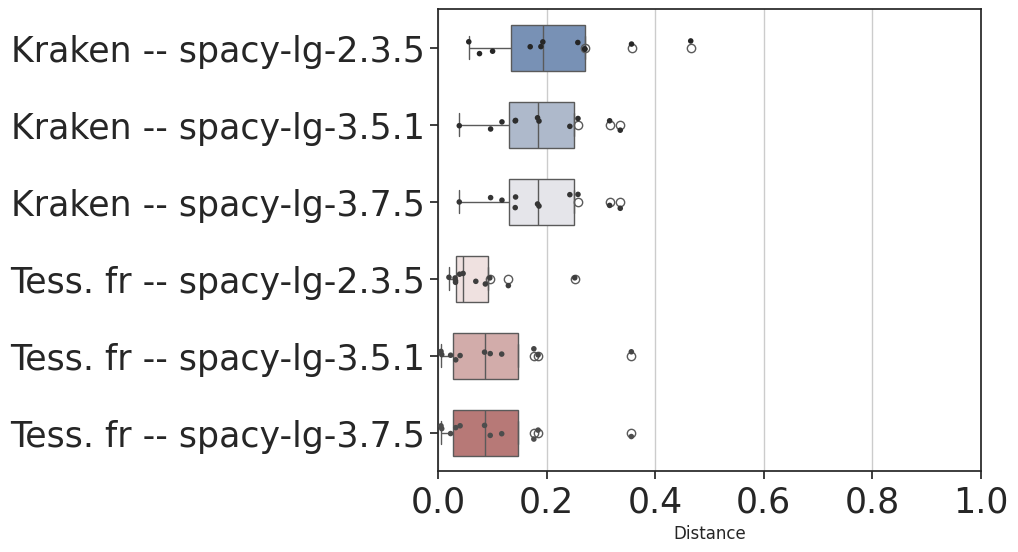

In [45]:
tableau={}
liste_version_spacy=[]
liste_config=[]
liste_dist=[]
liste_auteur=[]
liste_name_metric=[]
liste_version_ren=[]

## Ajouter : a représenter spacy 3.7, 3.5.1 et 2.3.5 sur les mêmes graphiques, b 1 graph distance cosinus et 1 graph distance jaccard.

calcul=["sim2-3","word"]
calc=calcul[0]
spacy_mod=["-lg","-sm","-md"]
spc_mod=spacy_mod[0]
x=1
path_data =f"../small-ELTeC-fra_spaCy/*/*/*OCR/*/NER/SIM/{calc}*.json"

for path in glob.glob(path_data):
    # print(path)
    if spc_mod in path:
        autor=path.split("/")[3]
        # autor=autor.split("_")[0]
        print(autor)
        version=path.split("/")[5]
        version=version.split("_")[-1]
        # print(version)
        vers_ren=path.split("_")[-1].split("-liste.json")[0]
        print(vers_ren)

        distance=lire_fichier(path)
        # print(distance)

        if version=="Kraken-base.txt" or version=="kraken" or version=="Kraken" :
            version=re.sub("Kraken-base.txt|kraken|Kraken",f"Kraken -- {vers_ren}",version)
            print("Version : ", version)

        if version=="kraken-jspll-pretrain.txt" or version=="kraken-jspll-pretrain":
            version=re.sub("kraken-jspll-pretrain.txt|kraken-jspll-pretrain","Kraken--jspl-fr",version)
            print("Version : ", version)
        if version=="Kraken-jspll-pretrain":
            version=re.sub("Kraken-jspll-pretrain","Kraken--jspl-en",version)
            print("Version : ", version)

        if version=="kraken-jspll-ELTeC.txt" or version=="kraken-jspll-ELTeC" :
            version=re.sub("kraken-jspll-ELTeC.txt|kraken-jspll-ELTeC","Kraken--jspl-ELTeCfr",version)
            print("Version : ", version)
        if  version=="Kraken-jspll-ELTeC":
            version=re.sub("Kraken-jspll-ELTeC","Kraken--jspl-ELTeCen",version)
            print("Version : ", version)
        if  version=="Kraken-jspl-ELTeC":
            version=re.sub("Kraken-jspl-ELTeC","Kraken--jspl-ELTeCpt",version)
            print("Version : ", version)

        if version=="TesseractFra-PNG.txt" or version=="TesseractFra-PNG" or version=="TesseractFra-png":
            version=re.sub("TesseractFra-PNG.txt|TesseractFra-PNG|TesseractFra-png",f"Tess. fr -- {vers_ren}",version)
            print("Version : ", version)

        if version=="tesseract" or version=="Tesseract-PNG":
             version=re.sub("tesseract|Tesseract-PNG","Tess.",version)
             print("Version : ", version)
        if version=="TesseractPor-PNG":
            version=re.sub("TesseractPor-PNG","Tess. pt",version)
            print("Version : ", version)

        if version=="TesseractFra-PNG-jspll-pretrain.txt" or version=="TesseractFra-PNG-jspll-pretrain":
            version=re.sub("TesseractFra-PNG-jspll-pretrain.txt|TesseractFra-PNG-jspll-pretrain","Tess. fr -- jspl-fr",version)
            print("Version : ", version)
        if  version=="tesseract-jspll-pretrain" or version =="Tesseract-PNG-jspll-pretrain" :
            version=re.sub("tesseract-jspll-pretrain|Tesseract-PNG-jspll-pretrain","Tess. -- jspl-en",version)
            print("Version : ", version)

        if version=="TesseractFra-PNG-jspll-ELTeC.txt" or version=="TesseractFra-PNG-jspll-ELTeC":
            version=re.sub("TesseractFra-PNG-jspll-ELTeC.txt|TesseractFra-PNG-jspll-ELTeC","Tess. fr -- jspl-ELTeCfr",version)
            print("Version : ", version)
        if  version=="Tesseract-PNG-jspll-ELTeC":
            version=re.sub("Tesseract-PNG-jspll-ELTeC","Tess. -- jspl-ELTeCen",version)
            print("Version : ", version)
        if version =="TesseractPor-PNG-jspl-ELTeC":
            version=re.sub("TesseractPor-PNG-jspl-ELTeC","Tess. pt -- jspl-ELTeCpt",version)
            print("Version : ", version)

        if version == "tesseract0.3.10":
            version = re.sub("tesseract0.3.10", "Tess. fr 3.10", version)
            print("version : ", version)

        if version == "kraken4.3.13.dev25":
            version = re.sub("kraken4.3.13.dev25", "Kraken 4.3.13", version)
            print("version : ", version)

        if version == "lectaurep-kraken4.3.13.dev25":
            version = re.sub("lectaurep-kraken4.3.13.dev25", "Kraken Lectp. 4.3.13", version)
            print("version : ", version)

        # liste_distance=[]
        for key, res_dist in distance.items():
            # print("Key : ",key)
            if key == "cosinus":
            # if key == "jaccard":
                for r in res_dist:
                    liste_name_metric.append(key)
                    liste_config.append(version)#+"--"+paire)
                    liste_auteur.append(autor)
                    liste_dist.append(r)
                    liste_version_ren.append(vers_ren)


tableau["Auteur"]=liste_auteur
tableau["Configuration"]=liste_config
tableau["Distance"]=liste_dist
tableau["Metric"]=liste_name_metric
tableau["REN"]=liste_version_ren
data_tab = pd.DataFrame(tableau)
data_tab=data_tab.sort_values(by = 'Configuration')
display(data_tab)


sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("linear")

# Load the example planets dataset
# planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
# sns.boxplot(x=data_tab.Distance[(data_tab.Metric=="cosinus") & (data_tab.Configuration=="kraken--lg--lg")],  y=data_tab.Configuration[data_tab.Configuration=="kraken--lg--lg"], data=data_tab,
#             whis=[0, 100], width=.6, palette="vlag")
sns.boxplot(x="Distance",  y="Configuration", data=data_tab,
        whis=[0, 1], width=.6, palette="vlag")#, legend=False)

# Add in points to show each observation
# sns.stripplot(x=data_tab.Distance[(data_tab.Metric=="cosinus") & (data_tab.Configuration=="kraken--lg--lg")], y=data_tab.Configuration[data_tab.Configuration=="kraken--lg--lg"], data=data_tab,
#               size=4, color=".3", linewidth=0)
sns.stripplot(x="Distance", y="Configuration", data=data_tab,
          size=4, palette='dark:.3', linewidth=0)#, legend=False)

# Tweak the visual presentation
plt.tick_params(axis = 'both', labelsize = 25)
ax.xaxis.grid(True)
ax.set(ylabel="")
plt.xlim([0,x])

#
#
# sns.despine(trim=True, left=True)
# plt.savefig(f"../Boite-a_moustache/{version_doc}_{calc}.png",dpi=300, bbox_inches="tight")##Texte
plt.savefig(f"../Boite-a_moustache/ARCHEO-spaCy_ELTeC-fra_Distances_spaCy{spc_mod}_cosinus-{calc}.png",dpi=300, bbox_inches="tight")##NER

In [63]:
# !python --version

## Graphique distances cosinus et Jaccard

In [ ]:
tableau={}
liste_version_spacy=[]
liste_config=[]
liste_dist=[]
liste_auteur=[]
liste_name_metric=[]
liste_version_ren=[]

## Ajouter : a représenter spacy 3.7, 3.5.1 et 2.3.5 sur les mêmes graphiques, b 1 graph distance cosinus et 1 graph distance jaccard.

lt_version_doc=["small-ELTeC-fra_EVAL2","small-ELTeC-fra_spaCy3.5.1","small-ELTeC-fra_corr-automatique-spaCy3.5.1","small-ELTeC-fra_corr-automatique_spaCy-2.3.5","small-ELTeC-fra_corr-automatique-spaCy3.7.5", "ELTeC-fra_Complet"]
# lt_version_doc=["fra_spaCy3.5.1","eng_spaCy3.5.1","Por_spaCy3.5.1"]
version_doc=lt_version_doc[-2]
metriK=["cosinus","jaccard"]
metrK=metriK[1]
calcul=["sim2-3","word"]
calc=calcul[0]
x=1

# path_data = f"../{version_doc}_Distances/*/*OCR/*/SIM/{calc}*.json"## Text
path_data = f"../{version_doc}_Distances/*/*OCR/*/NER/SIM/{calc}*.json"## NER

for path in glob.glob(path_data):
    print(path)
    autor=path.split("/")[4]
    autor=autor.split("_")[0]
    # print(autor)
    version=path.split("/")[4]
    version=version.split("_")[-1]
    # print(version)
    vers_ren=path.split("_")[-1].split("-liste.json")[0]
    print("vers_ren",vers_ren)
    
    distance=lire_fichier(path)
    print(distance)

    if version=="Kraken-base.txt" or version=="kraken" or version=="Kraken" :
        version=re.sub("Kraken-base.txt|kraken|Kraken","Kraken",version)
        print("Version : ", version)

    if version=="kraken-jspll-pretrain.txt" or version=="kraken-jspll-pretrain":
        version=re.sub("kraken-jspll-pretrain.txt|kraken-jspll-pretrain","Kraken--jspl-fr",version)
        print("Version : ", version)
    if version=="Kraken-jspll-pretrain":
        version=re.sub("Kraken-jspll-pretrain","Kraken--jspl-en",version)
        print("Version : ", version)

    if version=="kraken-jspll-ELTeC.txt" or version=="kraken-jspll-ELTeC" :
        version=re.sub("kraken-jspll-ELTeC.txt|kraken-jspll-ELTeC","Kraken--jspl-ELTeCfr",version)
        print("Version : ", version)
    if  version=="Kraken-jspll-ELTeC":
        version=re.sub("Kraken-jspll-ELTeC","Kraken--jspl-ELTeCen",version)
        print("Version : ", version)
    if  version=="Kraken-jspl-ELTeC":
        version=re.sub("Kraken-jspl-ELTeC","Kraken--jspl-ELTeCpt",version)
        print("Version : ", version)

    if version=="TesseractFra-PNG.txt" or version=="TesseractFra-PNG" or version=="TesseractFra-png":
        version=re.sub("TesseractFra-PNG.txt|TesseractFra-PNG|TesseractFra-png","Tess. fr",version)
        print("Version : ", version)

    if version=="tesseract" or version=="Tesseract-PNG":
         version=re.sub("tesseract|Tesseract-PNG","Tess.",version)
         print("Version : ", version)
    if version=="TesseractPor-PNG":
        version=re.sub("TesseractPor-PNG","Tess. pt",version)
        print("Version : ", version)

    if version=="TesseractFra-PNG-jspll-pretrain.txt" or version=="TesseractFra-PNG-jspll-pretrain":
        version=re.sub("TesseractFra-PNG-jspll-pretrain.txt|TesseractFra-PNG-jspll-pretrain","Tess. fr -- jspl-fr",version)
        print("Version : ", version)
    if  version=="tesseract-jspll-pretrain" or version =="Tesseract-PNG-jspll-pretrain" :
        version=re.sub("tesseract-jspll-pretrain|Tesseract-PNG-jspll-pretrain","Tess. -- jspl-en",version)
        print("Version : ", version)

    if version=="TesseractFra-PNG-jspll-ELTeC.txt" or version=="TesseractFra-PNG-jspll-ELTeC":
        version=re.sub("TesseractFra-PNG-jspll-ELTeC.txt|TesseractFra-PNG-jspll-ELTeC","Tess. fr -- jspl-ELTeCfr",version)
        print("Version : ", version)
    if  version=="Tesseract-PNG-jspll-ELTeC":
        version=re.sub("Tesseract-PNG-jspll-ELTeC","Tess. -- jspl-ELTeCen",version)
        print("Version : ", version)
    if version =="TesseractPor-PNG-jspl-ELTeC":
        version=re.sub("TesseractPor-PNG-jspl-ELTeC","Tess. pt -- jspl-ELTeCpt",version)
        print("Version : ", version)

    if version == "tesseract0.3.10":
        version = re.sub("tesseract0.3.10", "Tess. fr 3.10", version)
        print("version : ", version)

    if version == "kraken4.3.13.dev25":
        version = re.sub("kraken4.3.13.dev25", "Kraken 4.3.13", version)
        print("version : ", version)

    if version == "lectaurep-kraken4.3.13.dev25":
        version = re.sub("lectaurep-kraken4.3.13.dev25", "Kraken Lectp. 4.3.13", version)
        print("version : ", version)

    liste_distance=[]
    for key, res_dist in distance.items():
        # print("Key : ",key)
        if key == metrK:
            for r in res_dist:
            #     if paire =="spaCy_lg" and name_metric=="cosinus":#or paire=="sm--sm" or paire=="md--md":
                liste_name_metric.append(key)
                liste_config.append(version)#+"--"+paire)
                liste_auteur.append(autor)
                liste_dist.append(r)
                liste_version_ren.append(vers_ren)
#
#         # if key=="KL_res":
#         #     for k, v in res_dist.items():
#         #         if k=="Cosine Dist.":
#         #             print(v)
#         #             liste_name_metric.append(k)
#         #             # liste_version.append(version)
#         #             liste_config.append(version)#+"--"+paire)
#         #             liste_auteur.append(autor)
#         #             # liste_version_spacy.append(version_spacy)
#         #             liste_dist.append(v)

tableau["Auteur"]=liste_auteur
tableau["Configuration"]=liste_config
tableau["Distance"]=liste_dist
tableau["Metric"]=liste_name_metric
tableau["REN"]=liste_version_ren
data_tab = pd.DataFrame(tableau)
data_tab=data_tab.sort_values(by = 'Configuration')
# display(data_tab)

version_ren_set=set(liste_version_ren)
# # print(version_ren_set)
for i in version_ren_set:
    print(i)
    data_tab1=data_tab.query('REN == @i ')
    display(data_tab1)
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("linear")

    # Load the example planets dataset
    # planets = sns.load_dataset("planets")

    # Plot the orbital period with horizontal boxes
    # sns.boxplot(x=data_tab.Distance[(data_tab.Metric=="cosinus") & (data_tab.Configuration=="kraken--lg--lg")],  y=data_tab.Configuration[data_tab.Configuration=="kraken--lg--lg"], data=data_tab,
    #             whis=[0, 100], width=.6, palette="vlag")
sns.boxplot(x="Distance",  y="Configuration", data=data_tab1,
            whis=[0, 1], width=.6, palette="vlag")#, legend=False)

    # Add in points to show each observation
    # sns.stripplot(x=data_tab.Distance[(data_tab.Metric=="cosinus") & (data_tab.Configuration=="kraken--lg--lg")], y=data_tab.Configuration[data_tab.Configuration=="kraken--lg--lg"], data=data_tab,
    #               size=4, color=".3", linewidth=0)
sns.stripplot(x="Distance", y="Configuration", data=data_tab1,
              size=4, palette='dark:.3', linewidth=0)#, legend=False)

    # Tweak the visual presentation
plt.tick_params(axis = 'both', labelsize = 25)
ax.xaxis.grid(True)
ax.set(ylabel="")
plt.xlim([0,x])
#
#
#
# sns.despine(trim=True, left=True)
# plt.savefig(f"../Boite-a_moustache/{version_doc}_{metrK}-{calc}.png",dpi=300, bbox_inches="tight")##Texte
    plt.savefig(f"../Boite-a_moustache/{version_doc}_{i}-{metrK}-{calc}.png",dpi=300, bbox_inches="tight")##NER